In [52]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/shortened2.csv', index_col='time_slot', parse_dates=['time_slot'])

In [20]:
df.head()

,n_visits,n_shifts,utilization
time_slot,,,
2019-01-14,14,36,0.600023
2019-01-15,24,36,0.651213
2019-01-16,24,36,0.665499
2019-01-30,23,36,0.661332
2019-01-31,22,37,0.680456


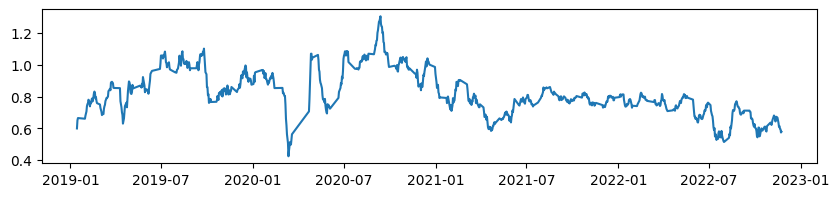

In [21]:
x = df.index
y = df['utilization']
plt.figure(figsize=(10, 2))
plt.plot(x,y)

In [51]:
# Load the data
df.index = pd.to_datetime(df.index) # Convert the index to datetime
df.sort_index(inplace=True) # Just to make sure data is in chronological order

# Split data into train and test sets (80/20 split)
train_size = int(len(df) * 0.8)
train, test = df['utilization'][:train_size], df['utilization'][train_size:]


In [77]:
# Array to test different values for the ARIMA variables
values = [1,2,3,4,5] 

In [74]:
# Fit the ARIMA model
def arima_model():
  for value in values:
    model = ARIMA(train, order=(10,value,value))
    model_fit = model.fit()
    # Make predictions
    start = len(train)
    end = start + len(test) - 1
    predictions = model_fit.get_prediction(start=start, end=end, dynamic=False)

    # Extract the predicted values
    predicted_values = predictions.predicted_mean

    # Calculate RMSE
    rmse = mean_squared_error(test, predicted_values, squared=False)
    print('------------------')
    print(f'Test RMSE: {rmse}')
    print('------------------')
    print(f'VALUE: {value}')
    print('------------------')
    # Plotting actual vs predicted data
    plt.figure(figsize=(10,2))
    # Train data
    plt.plot(train, label='Actual Train')
    plt.plot(model_fit.fittedvalues, label='Predicted Train')
    # Test data
    plt.plot(test.index, test, label='Actual Test')
    plt.plot(test.index, predicted_values, label='Predicted Test')
    plt.legend()
    plt.title("Actual vs Predicted")
    plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

------------------
Test RMSE: 0.11667870162861083
------------------
VALUE: 1
------------------


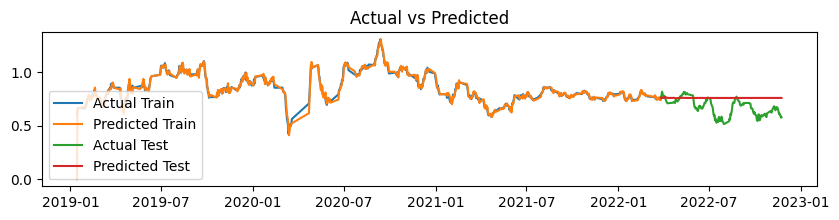

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

------------------
Test RMSE: 0.06556822855784285
------------------
VALUE: 2
------------------


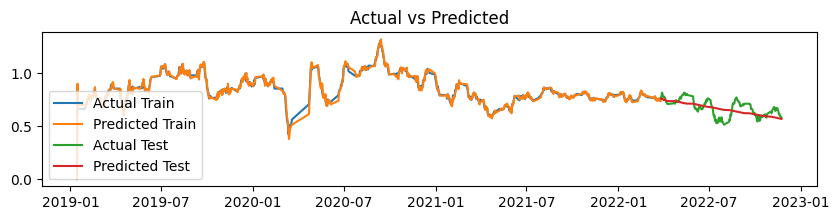

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

------------------
Test RMSE: 0.7172699564239682
------------------
VALUE: 3
------------------


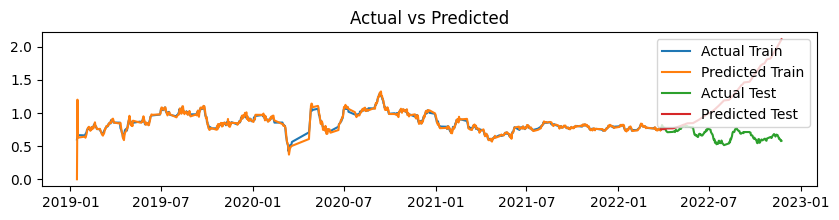

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

------------------
Test RMSE: 15.847702148568356
------------------
VALUE: 4
------------------


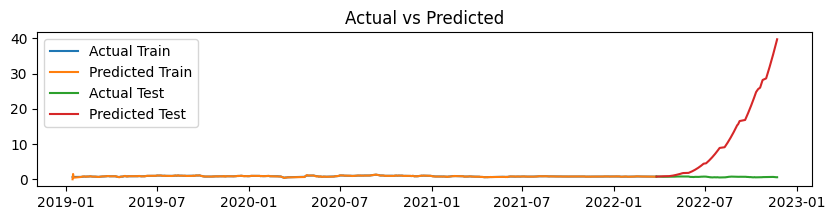

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

------------------
Test RMSE: 143.85927366247367
------------------
VALUE: 5
------------------


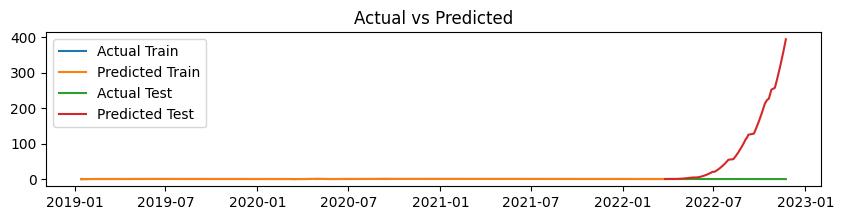

In [75]:
arima_model()

<Figure size 1400x700 with 0 Axes>

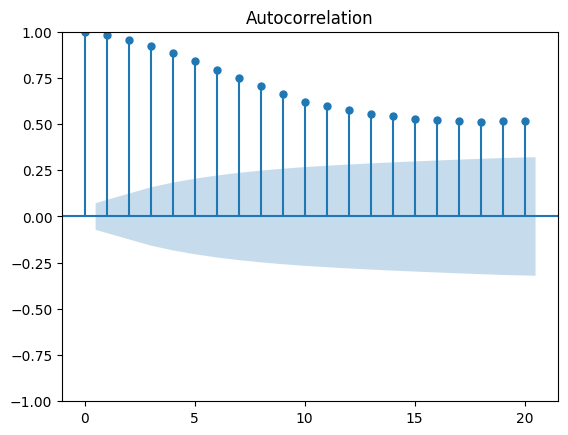

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1400x700 with 0 Axes>

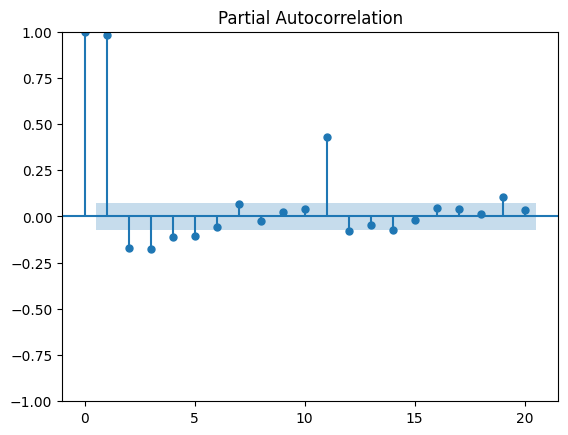

In [76]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create the autocorrelation plot
plt.figure(figsize=(14,7))
plot_acf(train, lags=20)
plt.show()

# Create the partial autocorrelation plot
plt.figure(figsize=(14,7))
plot_pacf(train, lags=20)
plt.show()
